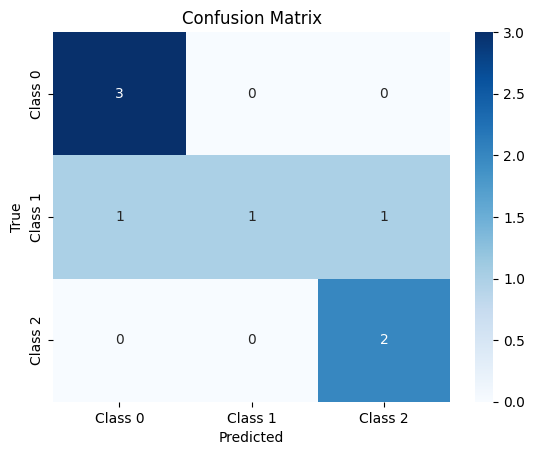

Classification Report:

              precision    recall  f1-score   support

     Class 0       0.75      1.00      0.86         3
     Class 1       1.00      0.33      0.50         3
     Class 2       0.67      1.00      0.80         2

    accuracy                           0.75         8
   macro avg       0.81      0.78      0.72         8
weighted avg       0.82      0.75      0.71         8



In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Actual vs Predicted labels
y_true = [0, 1, 2, 2, 0, 1, 1, 0]
y_pred = [0, 0, 2, 2, 0, 1, 2, 0]

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Class 0', 'Class 1', 'Class 2']

# Plot as heatmap
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))


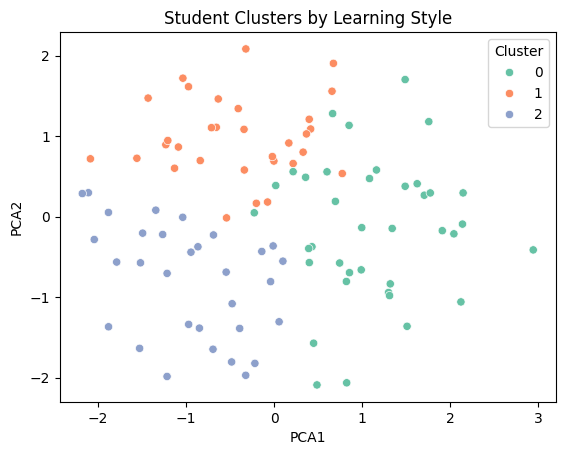

Cluster Centers (Learning Style Profiles):
   visual_score  auditory_score  kinesthetic_score
0      0.347034        1.043322          -0.450797
1      0.562559       -0.557859           0.806084
2     -0.987955       -0.721052          -0.253495


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Example: questionnaire_responses.csv
df = pd.read_csv('/content/student_methods.csv')

# Select only numerical features for scaling
# Assuming 'visual_score', 'auditory_score', and 'kinesthetic_score' are your numerical features
numerical_features = ['visual_score', 'auditory_score', 'kinesthetic_score']  # Replace with your actual numerical feature names
X_numerical = df[numerical_features]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Reduce dimensions for plotting (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title("Student Clusters by Learning Style")
plt.show()

# Optional: Inspect cluster centers (average response pattern)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features)  # Use numerical_features here
print("Cluster Centers (Learning Style Profiles):")
print(cluster_centers)